# Car Price Prediction Multiple Linear Regression

Problem in <a href='https://www.kaggle.com/datasets/hellbuoy/car-price-prediction'>Kaggle</a>

## Declaração do problema
A empresa automobilística chinesa Geely Auto aspira entrar no mercado dos EUA estabelecendo sua unidade de fabricação lá e produzindo carros localmente para competir com seus colegas americanos e europeus.

Eles contrataram uma empresa de consultoria automobilística para entender os fatores dos quais depende o preço dos carros. Especificamente, eles querem entender os fatores que afetam os preços dos carros no mercado americano, pois podem ser muito diferentes do mercado chinês. A empresa quer saber:

Quais variáveis ​​são significativas na previsão do preço de um carro
Como essas variáveis ​​descrevem o preço de um carro
Com base em várias pesquisas de mercado, a empresa de consultoria reuniu um grande conjunto de dados de diferentes tipos de carros no mercado americano.

## Objetivo de Negócios
Somos obrigados a modelar o preço dos carros com as variáveis ​​independentes disponíveis. Ele será usado pela administração para entender exatamente como os preços variam com as variáveis ​​independentes. Eles podem manipular o design dos carros, a estratégia de negócios etc. para atender a determinados níveis de preços. Além disso, o modelo será uma boa maneira de a administração entender a dinâmica de preços de um novo mercado.

## Dicionário de dados
Coluna|Descrição
-----|-----
Car_ID	|Sua classificação de risco de seguro atribuída, um valor de +3 indica que o automóvel é arriscado, -3 que provavelmente é bastante seguro. (Categórico)
carCompany |	Nome da empresa de carros (categórica)
fueltype |	Tipo de combustível de carro, ou seja, gás ou diesel (categórico)
aspiration | 	Aspiração usada em um carro (categórico)
doornumber |	Número de portas em um carro (categórico)
carbody |	Corpo de carro (categórico)
drivewheel |	tipo de roda de acionamento (categórica)
enginelocation |	Localização do motor do carro (categórico)
wheelbase |	Weelbase de carro (numérico)
carlength |	Comprimento do carro (numérico)
carwidth |	Largura do carro (numérico)
carheight |	Altura do carro (numérico)
curbweight |	O peso de um carro sem ocupantes ou bagagem. (Numérico)
enginetype |	Tipo de motor. (Categórico)
cylindernumber |	Cilindro colocado no carro (categórico)
enginesize |	Tamanho do carro (numérico)
fuelsystem |	Sistema de combustível de carro (categórico)
boreratio |	Boreratio de carro (numérico)
stroke |	AVC ou volume dentro do motor (numérico)
compressionratio |	Taxa de compressão de carro (numérico)
horsepower |	Potência (numérica)
peakrpm |	RPM de pico de carro (numérico)
citympg |	Milhagem na cidade (numérica)
highwaympg |	Milhagem na rodovia (numérica)
price(Dependent variable) |	Preço do carro (numérico)

## 1. Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
dados = pd.read_csv('dados/CarPrice_Assignment.csv')

In [3]:
dados.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
dados.shape

(205, 26)

## 1.2 Análises Preliminares

In [5]:
#Estatística descritiva
dados.describe().round(2)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [6]:
dados.corr().round(2).loc['price']

car_ID             -0.11
symboling          -0.08
wheelbase           0.58
carlength           0.68
carwidth            0.76
carheight           0.12
curbweight          0.84
enginesize          0.87
boreratio           0.55
stroke              0.08
compressionratio    0.07
horsepower          0.81
peakrpm            -0.09
citympg            -0.69
highwaympg         -0.70
price               1.00
Name: price, dtype: float64

In [7]:
# Checando dados nulos
dados.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
dados['symboling'] = dados['symboling'].astype(str)
dados['symboling'] = dados['symboling'].str.replace('-3','0')
dados['symboling'] = dados['symboling'].str.replace('-2','1')
dados['symboling'] = dados['symboling'].str.replace('-1','2')
dados['symboling'] = dados['symboling'].str.replace('0','3')
dados['symboling'] = dados['symboling'].str.replace('1','4')
dados['symboling'] = dados['symboling'].str.replace('2','5')
dados['symboling'] = dados['symboling'].str.replace('3','5')
dados['symboling'] = dados['symboling'].astype(int)

# 2.1 Comportamento da Variável Dependente (Y)

In [9]:
# configuração de grafico

# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

sns.set_palette('Accent')

# style -> white, dark, whitegrid, darkgrid, ticks

sns.set_style('darkgrid')

/home/leandric/Documentos/Projetos/Car-Price-Prediction-Multiple-Linear-Regression/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Preço de Carros'}>

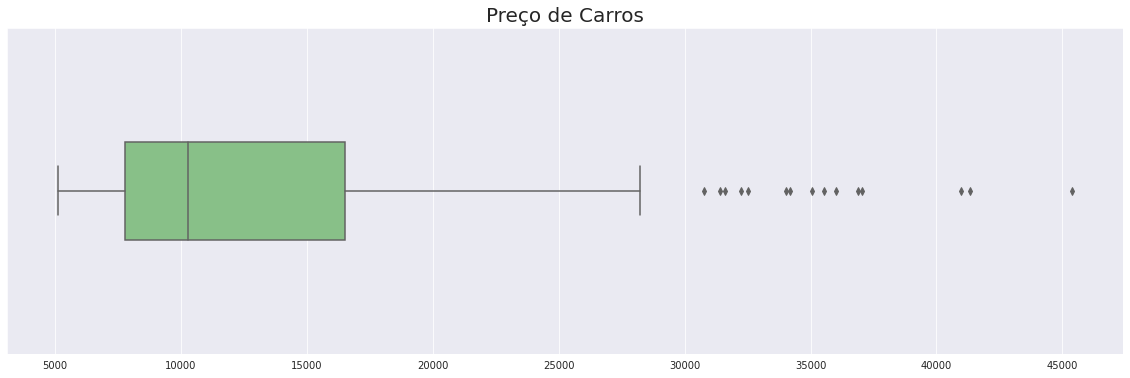

In [10]:
ax = sns.boxplot(dados['price'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço de Carros', fontsize=20)
ax.set_xlabel('', fontsize=16)
ax

## 2.2 Distribuição de Frequências

### Distribuição de frequências da variável dependente (y)

/home/leandric/Documentos/Projetos/Car-Price-Prediction-Multiple-Linear-Regression/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='Preço de Automóveis', ylabel='Density'>

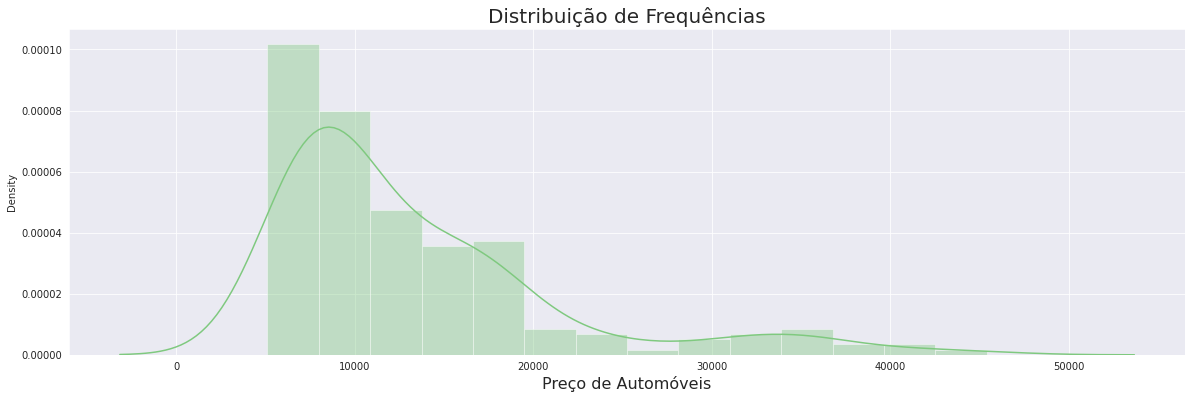

In [11]:
ax = sns.distplot(dados['price'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço de Automóveis', fontsize=16)
ax

<b>Possivel notar assimetria a direita, para melhorar o modelo o ideal é o comportamento se semelhante a uma distribuição normal</b>

## 2.3 Dispersão Entre as Variáveis

In [12]:
# Label Encoder

label_encoder = LabelEncoder()

columns = ['CarName','fueltype','aspiration',
       'doornumber','carbody','drivewheel',
       'enginelocation','enginetype','cylindernumber',
       'fuelsystem']

for column in columns:
    dados[f'encoder_{column}'] = label_encoder.fit_transform(dados[column])

columns_encoder = ['encoder_CarName','encoder_fueltype','encoder_aspiration',
       'encoder_doornumber','encoder_carbody','encoder_drivewheel',
       'encoder_enginelocation','encoder_enginetype','encoder_cylindernumber',
       'encoder_fuelsystem']

In [13]:
dados.corr().round(2).loc['price']

car_ID                   -0.11
symboling                 0.23
wheelbase                 0.58
carlength                 0.68
carwidth                  0.76
carheight                 0.12
curbweight                0.84
enginesize                0.87
boreratio                 0.55
stroke                    0.08
compressionratio          0.07
horsepower                0.81
peakrpm                  -0.09
citympg                  -0.69
highwaympg               -0.70
price                     1.00
encoder_CarName          -0.23
encoder_fueltype         -0.11
encoder_aspiration        0.18
encoder_doornumber       -0.03
encoder_carbody          -0.08
encoder_drivewheel        0.58
encoder_enginelocation    0.32
encoder_enginetype        0.05
encoder_cylindernumber   -0.03
encoder_fuelsystem        0.53
Name: price, dtype: float64

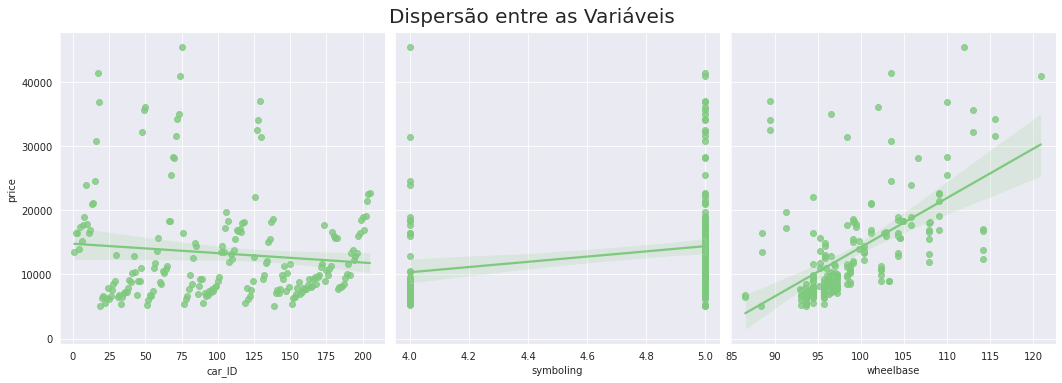

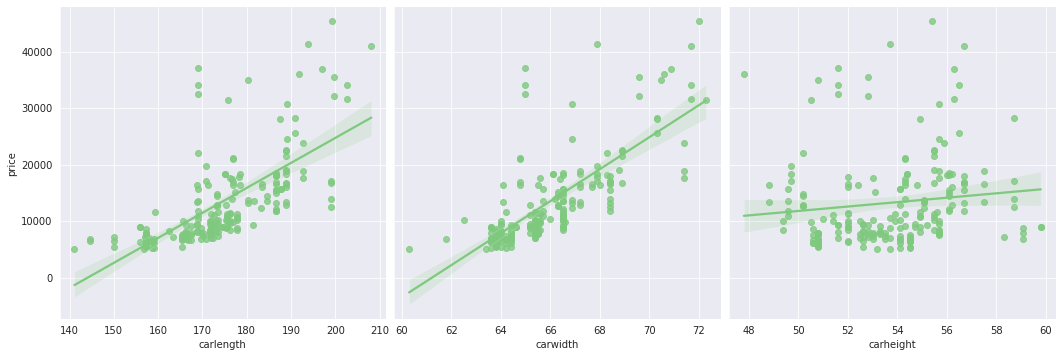

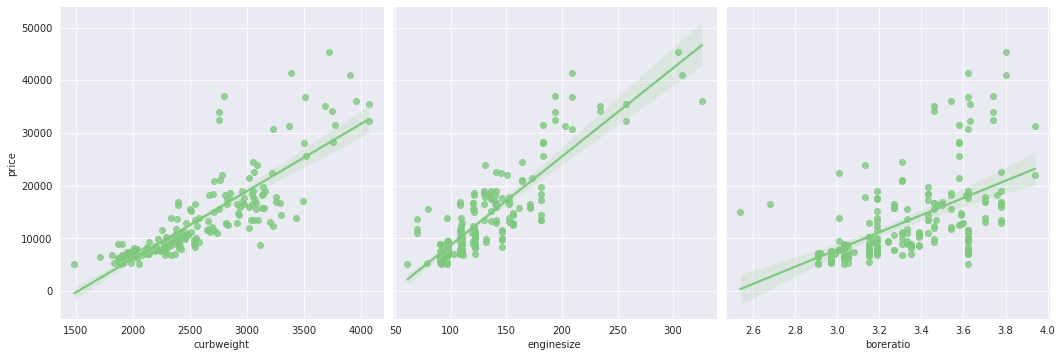

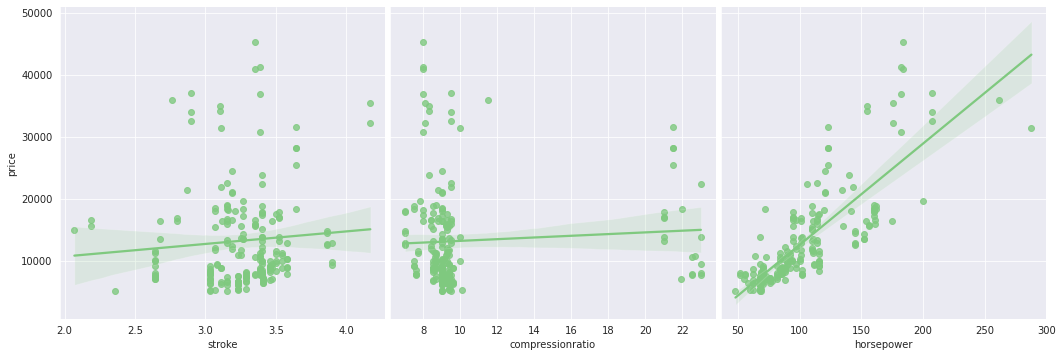

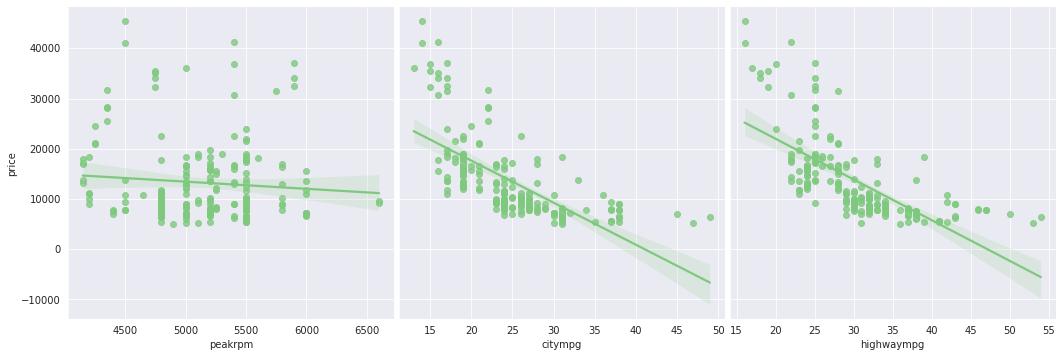

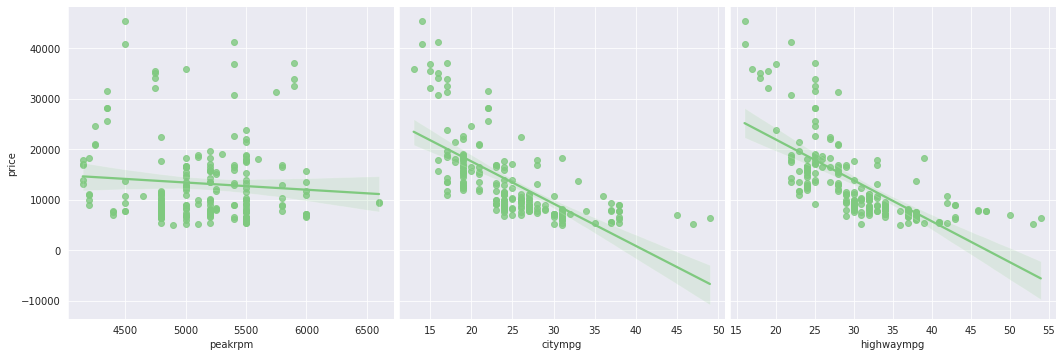

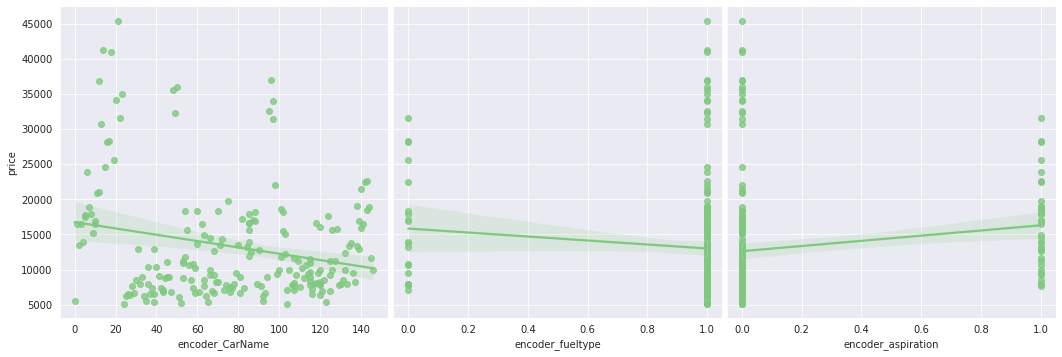

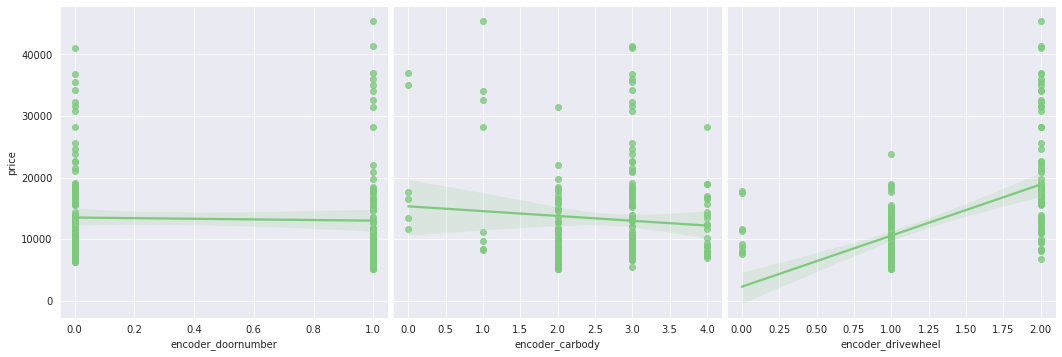

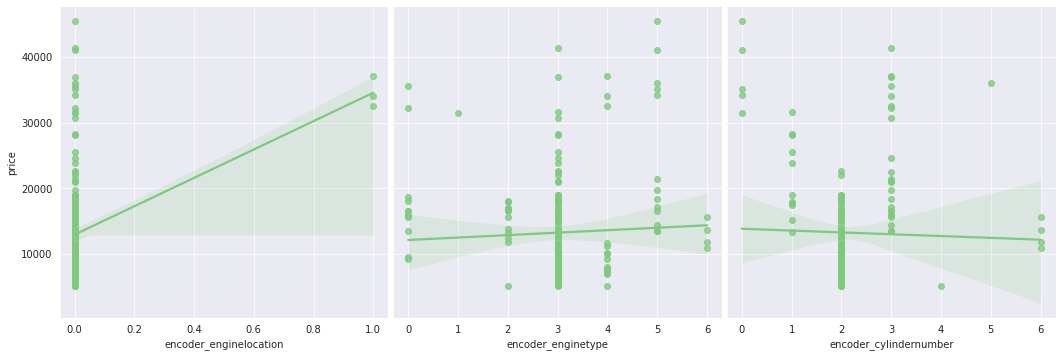

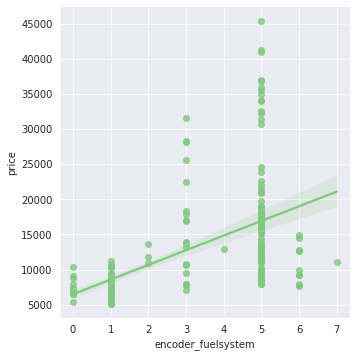

In [14]:
ax = sns.pairplot(dados, y_vars='price',x_vars = ['car_ID','symboling','wheelbase'], height=5, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

ax = sns.pairplot(dados, y_vars='price',x_vars = ['carlength','carwidth','carheight'], height=5, kind='reg')
ax

ax = sns.pairplot(dados, y_vars='price',x_vars = ['curbweight','enginesize','boreratio'], height=5, kind='reg')
ax

ax = sns.pairplot(dados, y_vars='price',x_vars = ['stroke','compressionratio','horsepower'], height=5, kind='reg')
ax

ax = sns.pairplot(dados, y_vars='price',x_vars = ['peakrpm','citympg','highwaympg'], height=5, kind='reg')
ax

ax = sns.pairplot(dados, y_vars='price',x_vars = ['peakrpm','citympg','highwaympg'], height=5, kind='reg')
ax

ax = sns.pairplot(dados, y_vars='price',x_vars = ['encoder_CarName','encoder_fueltype','encoder_aspiration'], height=5, kind='reg')
ax

ax = sns.pairplot(dados, y_vars='price',x_vars = ['encoder_doornumber','encoder_carbody','encoder_drivewheel'], height=5, kind='reg')
ax

ax = sns.pairplot(dados, y_vars='price',x_vars = ['encoder_enginelocation','encoder_enginetype','encoder_cylindernumber'], height=5, kind='reg')
ax

ax = sns.pairplot(dados, y_vars='price',x_vars = ['encoder_fuelsystem'], height=5, kind='reg')
ax

## 3.1 Transformando os Dados

/home/leandric/Documentos/Projetos/Car-Price-Prediction-Multiple-Linear-Regression/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='Preço de Automóveis', ylabel='Density'>

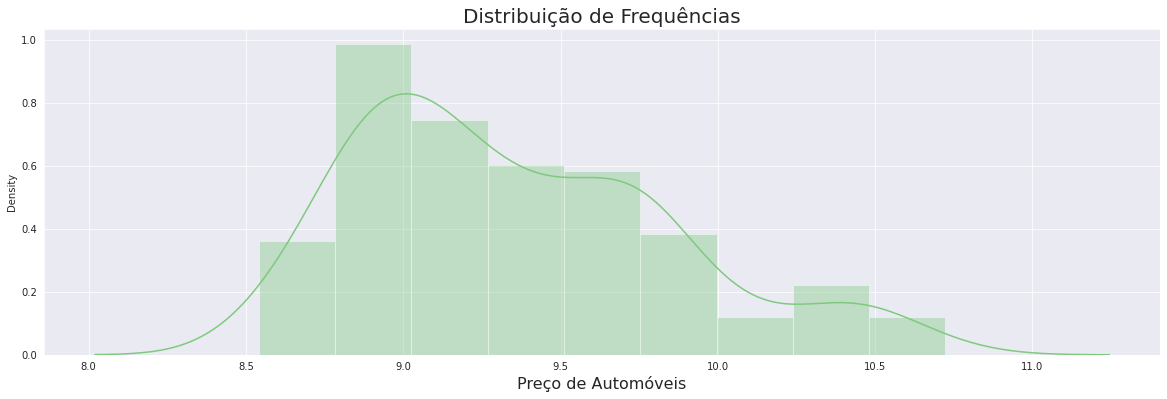

In [15]:
ax = sns.distplot(np.log(dados['price']))
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço de Automóveis', fontsize=16)
ax


<b>Aqui usarei o logaritmo das variaveis para tornar a variavel dependente (y) mais proxima de uma distribuição normal assim melhorando a performance do modelo<b/>

In [16]:
#colunas de interesse
columns = ['encoder_CarName','encoder_fueltype','encoder_aspiration',
       'encoder_doornumber','encoder_carbody','encoder_drivewheel',
       'encoder_enginelocation','encoder_enginetype','encoder_cylindernumber',
       'encoder_fuelsystem','car_ID','symboling','wheelbase','carlength','carwidth',
       'carheight','curbweight','enginesize','boreratio','stroke','compressionratio',
       'horsepower','peakrpm','citympg','highwaympg','price']

dados_encoder = dados[columns].copy()

dados_encoder.set_index('car_ID', inplace=True)

dados_encoder.head()

,encoder_CarName,encoder_fueltype,encoder_aspiration,encoder_doornumber,encoder_carbody,encoder_drivewheel,encoder_enginelocation,encoder_enginetype,encoder_cylindernumber,encoder_fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,2,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,1,0,1,2,2,0,5,3,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,4,1,0,0,3,1,0,3,2,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,5,1,0,0,3,0,0,3,1,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


## Aplicando a transformação logarítmica aos dados do dataset

In [17]:
columns_log = []

for column_name in dados_encoder.columns:
    column = dados_encoder[column_name]
    if ((column == 0).sum()) >0:
        dados_encoder[f'log_{column_name}'] = np.log(dados_encoder[column_name]+1)
        columns_log.append(f'log_{column_name}')
    else:
        dados_encoder[f'log_{column_name}'] = np.log(dados_encoder[column_name])
        columns_log.append(f'log_{column_name}')
        
dados_encoder[columns_log].head()

,log_encoder_CarName,log_encoder_fueltype,log_encoder_aspiration,log_encoder_doornumber,log_encoder_carbody,log_encoder_drivewheel,log_encoder_enginelocation,log_encoder_enginetype,log_encoder_cylindernumber,log_encoder_fuelsystem,...,log_curbweight,log_enginesize,log_boreratio,log_stroke,log_compressionratio,log_horsepower,log_peakrpm,log_citympg,log_highwaympg,log_price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,1.098612,0.693147,0.0,0.693147,0.000000,1.098612,0.0,0.000000,1.098612,1.791759,...,7.843064,4.867534,1.244155,0.985817,2.197225,4.709530,8.517193,3.044522,3.295837,9.510075
2,1.386294,0.693147,0.0,0.693147,0.000000,1.098612,0.0,0.000000,1.098612,1.791759,...,7.843064,4.867534,1.244155,0.985817,2.197225,4.709530,8.517193,3.044522,3.295837,9.711116
3,0.693147,0.693147,0.0,0.693147,1.098612,1.098612,0.0,1.791759,1.386294,1.791759,...,7.945555,5.023881,0.985817,1.244155,2.197225,5.036953,8.517193,2.944439,3.258097,9.711116
4,1.609438,0.693147,0.0,0.000000,1.386294,0.693147,0.0,1.386294,1.098612,1.791759,...,7.756623,4.691348,1.160021,1.223775,2.302585,4.624973,8.612503,3.178054,3.401197,9.543235
5,1.791759,0.693147,0.0,0.000000,1.386294,0.000000,0.0,1.386294,0.693147,1.791759,...,7.945910,4.912655,1.160021,1.223775,2.079442,4.744932,8.612503,2.890372,3.091042,9.767095


In [18]:
dados_encoder.isna().sum()

encoder_CarName               0
encoder_fueltype              0
encoder_aspiration            0
encoder_doornumber            0
encoder_carbody               0
encoder_drivewheel            0
encoder_enginelocation        0
encoder_enginetype            0
encoder_cylindernumber        0
encoder_fuelsystem            0
symboling                     0
wheelbase                     0
carlength                     0
carwidth                      0
carheight                     0
curbweight                    0
enginesize                    0
boreratio                     0
stroke                        0
compressionratio              0
horsepower                    0
peakrpm                       0
citympg                       0
highwaympg                    0
price                         0
log_encoder_CarName           0
log_encoder_fueltype          0
log_encoder_aspiration        0
log_encoder_doornumber        0
log_encoder_carbody           0
log_encoder_drivewheel        0
log_enco

In [19]:
dados_encoder.dropna(inplace=True)

## 4.1 Criando os *Datasets* de Treino e Teste

### Criando uma Series para armazenar a variável dependente (y)

In [20]:
y = dados_encoder['log_price']

### Criando uma Series para armazenar a variável explicativas (X)

In [21]:
X = dados_encoder[columns_log]
X.drop(['log_price','log_encoder_CarName'], axis=1, inplace=True)

/tmp/ipykernel_8099/2451841294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['log_price','log_encoder_CarName'], axis=1, inplace=True)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

### Estimando o modelo com statsmodels

In [23]:
X_train_com_constante = sm.add_constant(X_train)

In [24]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()

In [25]:
modelo_statsmodels.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     49.61
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           6.86e-56
Time:                        22:46:50   Log-Likelihood:                 67.455
No. Observations:                 164   AIC:                            -86.91
Df Residuals:                     140   BIC:                            -12.51
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -9.2800      4.932     -1.882      0.062     -19.030       0.470
log_encoder_fueltype          -0.1853      0.513     -0.361      0.718      -1.199       0.829
log_encoder_aspiration        -0.0682      0.119     -0.572      0.568      -0.304       0.167
log_encoder_doornumber        -0.0383      0.058     -0.661      0.509      -0.153       0.076
log_encoder_carbody           -0.0798      0.069     -1.153      0.251      -0.217       0.057
log_encoder_drivewheel         0.1290      0.078      1.657      0.100      -0.025       0.283
log_encoder_enginelocation     0.7118      0.234      3.044      0.003       0.249       1.174
log_encoder_enginetype         0.0267      0.043      0.616      0.539      -0.059       0.113
log_encoder_cylindernumber    -0.0299      0.078     -0.381      0.704      -0.185       0.125
log_encoder_fuelsystem        -0.0081      0.039     -0.206      0.837      -0.086       0.069
log_symboling                  0.0918      0.166      0.552      0.582      -0.237       0.420
log_wheelbase                  0.8731      0.689      1.267      0.207      -0.489       2.236
log_carlength                 -0.1887      0.635     -0.297      0.767      -1.445       1.067
log_carwidth                   1.9570      1.146      1.708      0.090      -0.309       4.223
log_carheight                  0.0090      0.503      0.018      0.986      -0.986       1.004
log_curbweight                 0.6080      0.308      1.975      0.050      -0.001       1.217
log_enginesize                 0.2410      0.196      1.232      0.220      -0.146       0.628
log_boreratio                 -0.5274      0.245     -2.156      0.033      -1.011      -0.044
log_stroke                    -0.3534      0.167     -2.117      0.036      -0.683      -0.023
log_compressionratio           0.1486      0.353      0.420      0.675      -0.550       0.847
log_horsepower                 0.4382      0.198      2.212      0.029       0.046       0.830
log_peakrpm                    0.1369      0.250      0.548      0.585      -0.357       0.631
log_citympg                   -0.5377      0.336     -1.599      0.112      -1.202       0.127
log_highwaympg                 0.2032      0.320      0.635      0.526      -0.429       0.836
==============================================================================
Omnibus:                        5.515   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.124
Skew:                           0.366   Prob(JB):                       0.0771
Kurtosis:                       3.463   Cond. No.                     6.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the 

In [36]:
columns = ['log_encoder_enginelocation','log_encoder_drivewheel','log_boreratio','log_citympg',
           'log_carwidth','log_curbweight','log_stroke','log_horsepower']



In [37]:
modelo = LinearRegression()

In [38]:
modelo.fit(X_train[columns], y_train)

LinearRegression()

In [39]:
modelo.score(X_train[columns], y_train).round(3)

0.876

In [40]:
y_predict = modelo.predict(X_test[columns])

In [41]:
metrics.r2_score(y_test, y_predict).round(3)

0.903

In [51]:
df = pd.DataFrame({'teste':np.exp(y_test),'real':np.exp(y_predict)})

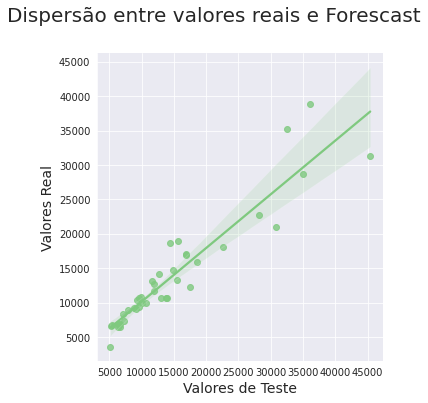

In [55]:
ax = sns.lmplot(x='teste', y='real', data=df)
ax.fig.suptitle('Dispersão entre valores reais e Forescast', fontsize=20, y=1.1)
ax.set_axis_labels("Valores de Teste", 'Valores Real', fontsize =14)
ax